# Mid-term Project. EDA

## Завантаження та перегляд даних

У цій клітинці поступово вношу всі потрібні імпорти

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

Читання даних з файлу з вказуванням роздільника ;

In [2]:
data = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Перегляд даних

In [4]:
data['duration'].head(30)

0     261
1     149
2     226
3     151
4     307
5     198
6     139
7     217
8     380
9      50
10     55
11    222
12    137
13    293
14    146
15    174
16    312
17    440
18    353
19    195
20     38
21    262
22    342
23    181
24    172
25     99
26     93
27    233
28    255
29    362
Name: duration, dtype: int64

In [5]:
data.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Аналіз та кодування категоріальних колонок

In [7]:
len(data.select_dtypes(include = "object").columns)

11

In [8]:
print(data.select_dtypes(include = "object").columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [9]:
data.isnull().values.any()

False

Дані не містять пропущених значень. Також є 11 категоріальних колонок, включно з таргет колонкою

Унікальні значення для категоріальних колонок

In [10]:
data.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [11]:
data.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [12]:
data.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [13]:
data.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [14]:
data.housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [15]:
data.loan.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [16]:
data.contact.unique()

array(['telephone', 'cellular'], dtype=object)

In [17]:
data.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [18]:
data.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [19]:
data.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

Кодування бінарної колонки contact

In [20]:
tel_codes = {'telephone': 0, 'cellular': 1}
data['tel_code'] = data.contact.map(tel_codes)

Колонки default, loan та housing мають по 3 значення, тож закодую їх за допомогою label encoding

In [21]:
no_yes_un = ['no', 'yes', 'unknown']
data['default_encoded'] = data['default'].astype(pd.CategoricalDtype(categories=no_yes_un, ordered=True)).cat.codes
data['loan_encoded'] = data['loan'].astype(pd.CategoricalDtype(categories=no_yes_un, ordered=True)).cat.codes
data['housing_encoded'] = data['housing'].astype(pd.CategoricalDtype(categories=no_yes_un, ordered=True)).cat.codes

Дані наступних колонок також закодовані за допомогою label encoding

In [22]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

data['month_encoded'] = data['month'].astype(pd.CategoricalDtype(categories=month_order, ordered=True)).cat.codes
data['day_of_week_encoded'] = data['day_of_week'].astype(pd.CategoricalDtype(categories=day_order, ordered=True)).cat.codes

print(data)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  cons.conf.

Далі використовуючи one hot encoding закодую колонки 'job', 'marital', 'education', 'poutcome'

In [23]:
enc = preprocessing.OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit(data[['job', 'marital', 'education', 'poutcome']])
enc.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single', 'unknown'], dtype=object),
 array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object),
 array(['failure', 'nonexistent', 'success'], dtype=object)]

In [24]:
encoded_cols = list(enc.get_feature_names_out(['job', 'marital', 'education', 'poutcome']))
data[encoded_cols] = enc.transform(data[['job', 'marital', 'education', 'poutcome']])

In [25]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Кодування таргет колонки

In [26]:
y_codes = {'yes': 1, 'no': 0}
data['y_code'] = data.y.map(y_codes)

Видалення категоріальних колонок

In [27]:
data.drop(columns=data.select_dtypes(include="object").columns, inplace=True)

In [28]:
data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,y_code
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


Кореляційна матриця

In [29]:
corr_df = data.select_dtypes(include='number').corr()

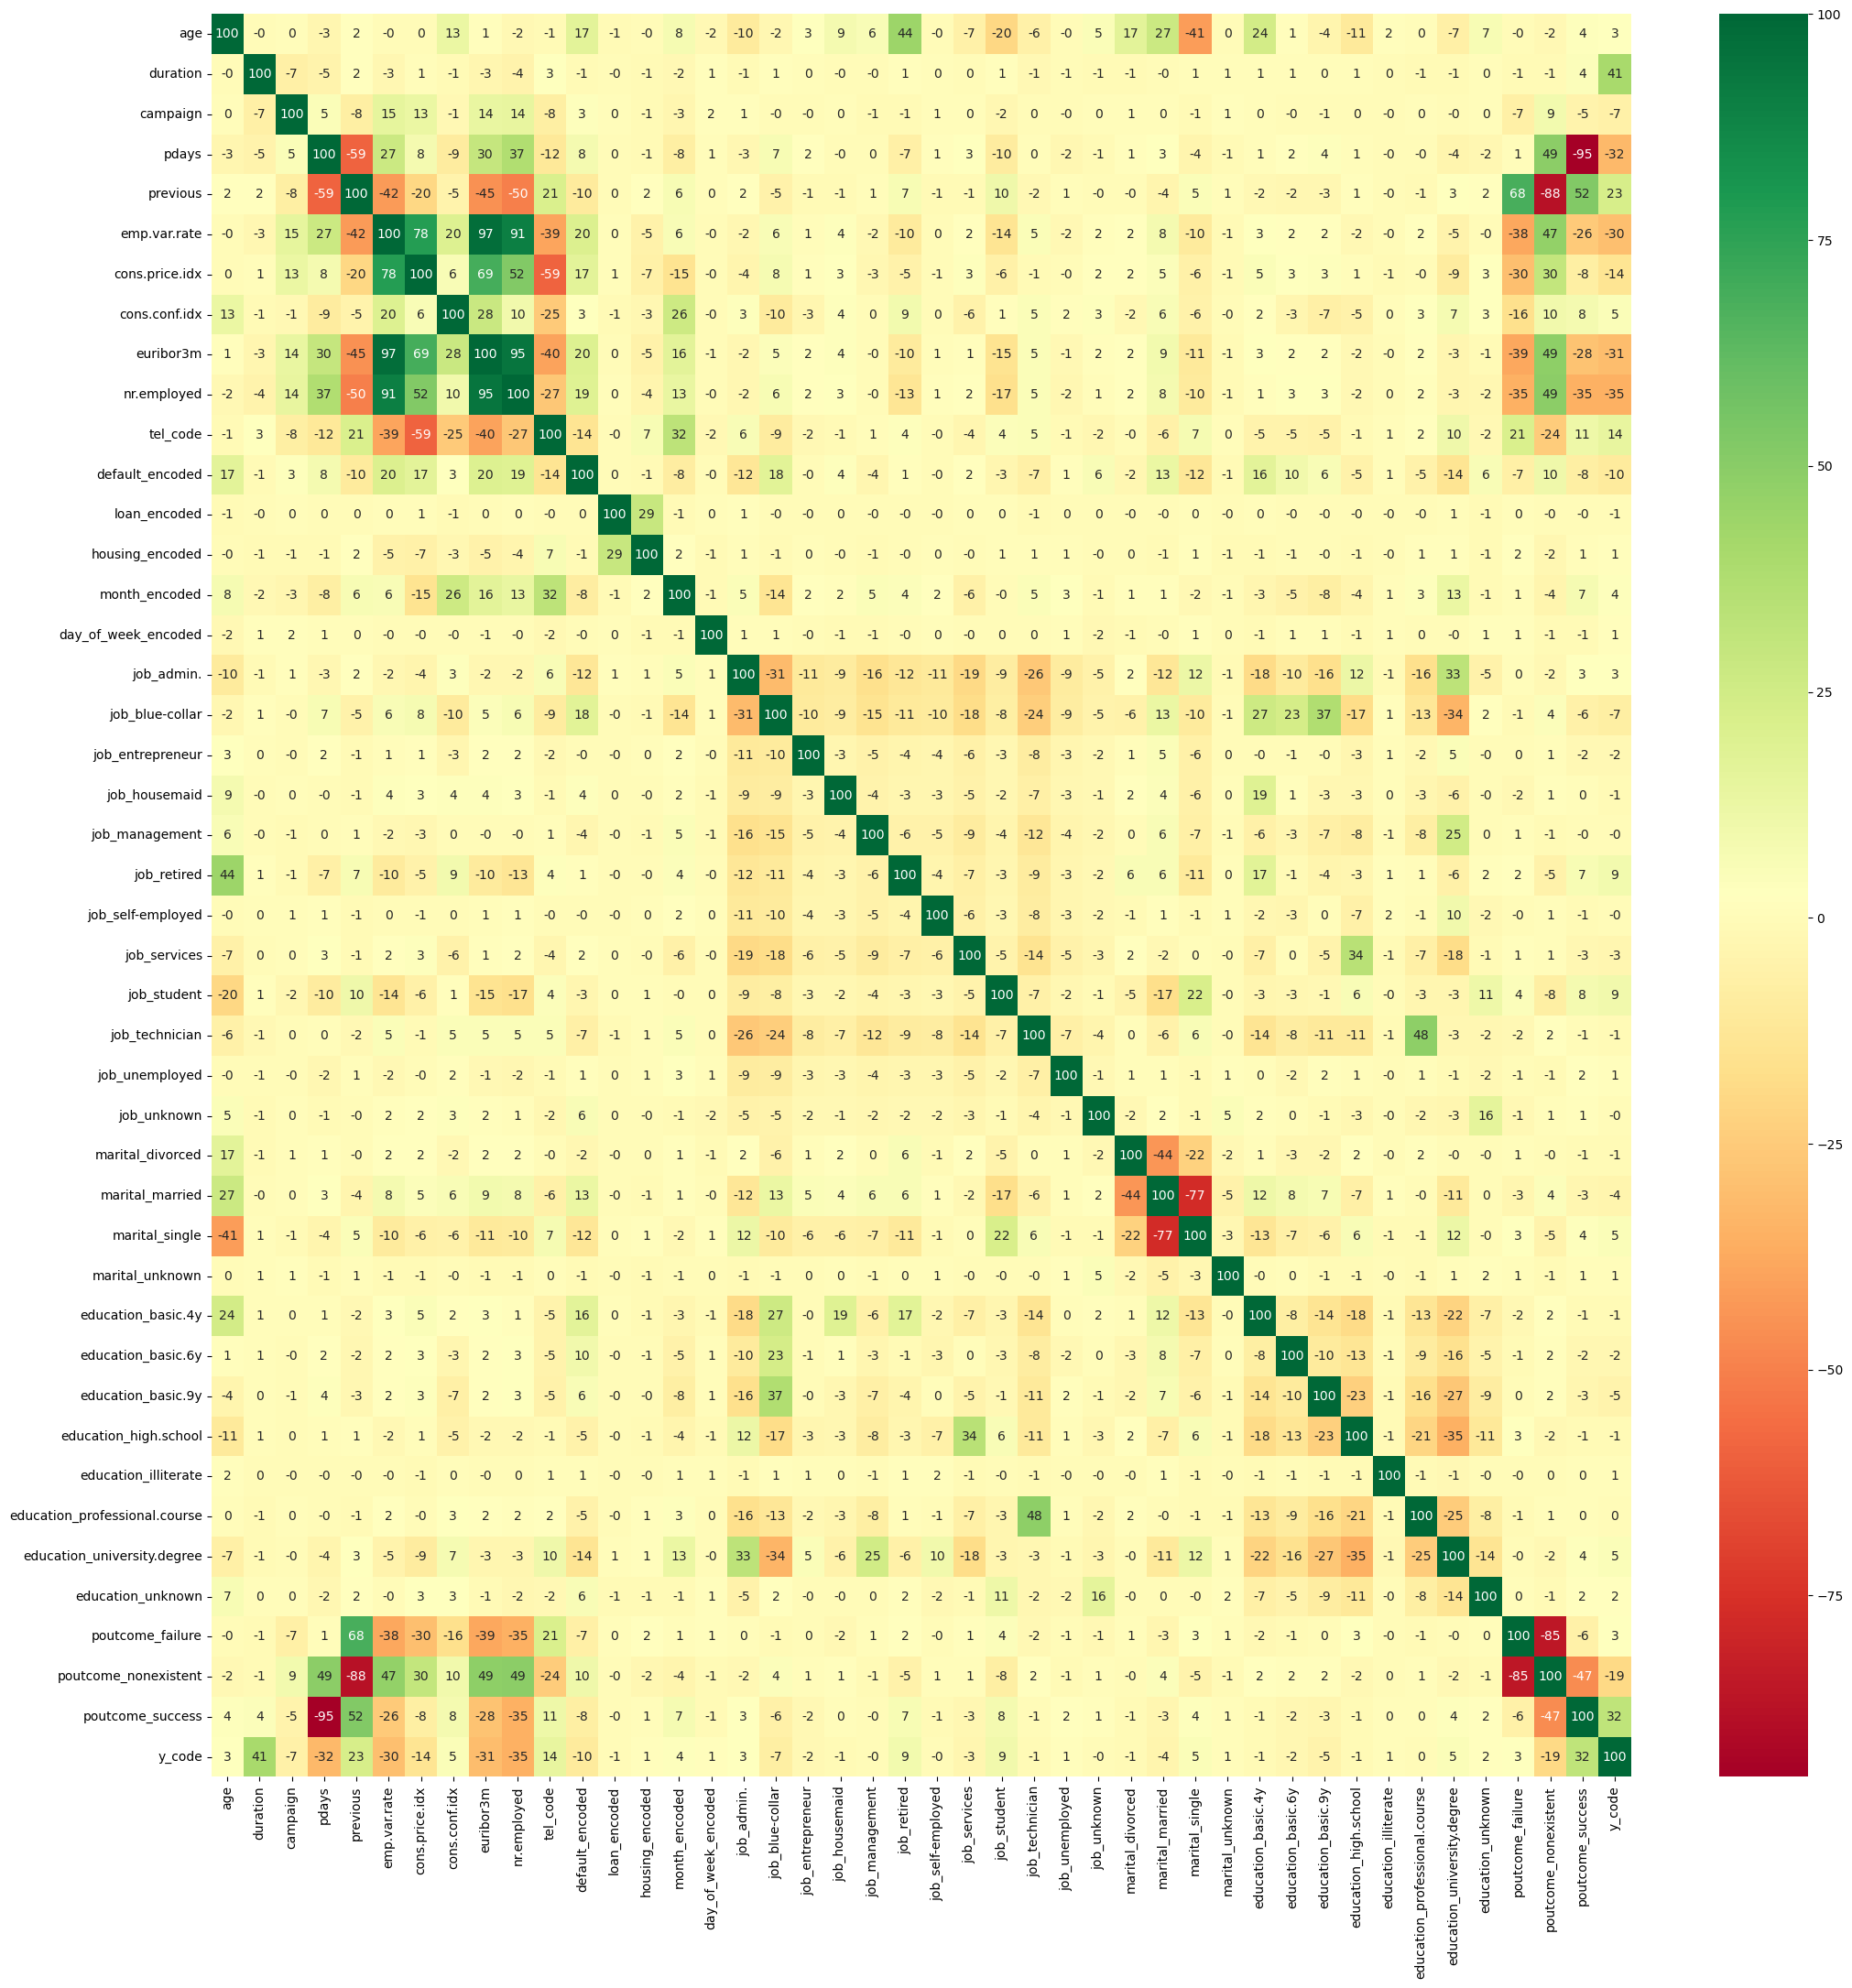

In [30]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df*100, annot = True, cmap = "RdYlGn", cbar = True, fmt='.0f')
plt.show()

In [31]:
corr_df["y_code"].sort_values(ascending=False).head()

y_code              1.000000
duration            0.405274
poutcome_success    0.316269
previous            0.230181
tel_code            0.144773
Name: y_code, dtype: float64

Отже найбільшу кореляцію з тагрет змінною мають колонки duration, previous та poutcome_success(колонка, що вказує на успішний результат попередньої маркетингової кампанії)

## Робота зі стовбцем duration

Дані записані в секундах, переведу іх у хвилини та видалю колонку з даними в секундах

In [32]:
data['duration_m'] = data['duration'] / 60

In [33]:
data.drop(columns='duration', inplace=True)

## Робота зі стовбцем age

У колонці age є значення які зустрічаються дуже рідко. Вважаю доречним видалити рядки з цими значеннями

In [34]:
data['age'].value_counts().sort_values(ascending=True).head(15)

age
95     1
87     1
94     1
98     2
91     2
89     2
92     4
17     5
84     7
86     8
79    14
85    15
82    17
83    17
81    20
Name: count, dtype: int64

In [35]:
rare_ages = data['age'].value_counts()[data['age'].value_counts() < 9].index

data.drop(data[data['age'].isin(rare_ages)].index, inplace=True)

In [36]:
data['age'].value_counts().sort_index()

age
18     28
19     42
20     65
21    102
22    137
     ... 
81     20
82     17
83     17
85     15
88     22
Name: count, Length: 68, dtype: int64

Тепер дані для цієї колонки знаходяться в діапазоні між 18 і 88, за допомогою функції категоризую дані по 10 років

In [37]:
def age_cat(years):
    if years <= 28:
        return '18-28'
    elif years > 28 and years <= 38:
        return '28-38'
    elif years > 38 and years <= 48:
        return '38-48'
    elif years > 48 and years <= 58:
        return '48-58'
    elif years > 58 and years <= 68:
        return '58-68'
    elif years > 68 and years <= 78:
        return '68-78'
    elif years > 78 and years <= 88:
        return '78-88'

In [38]:
data['age_cat'] = data['age'].apply(age_cat)

In [39]:
data['age_cat'].value_counts().sort_values(ascending = False)

age_cat
28-38    16959
38-48    11119
48-58     7238
18-28     4211
58-68     1153
68-78      339
78-88      136
Name: count, dtype: int64

In [40]:
data.drop(columns='age', inplace=True)

In [41]:
age_order = ['18-28', '28-38', '38-48', '48-58', '58-68', '68-78', '78-88']

data['age_encoded'] = data['age_cat'].astype(pd.CategoricalDtype(categories=age_order, ordered=True)).cat.codes

In [42]:
data.head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,tel_code,default_encoded,...,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,y_code,duration_m,age_cat,age_encoded
0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,4.350000,48-58,3
1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0,2.483333,48-58,3
2,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,3.766667,28-38,1
3,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,2.516667,38-48,2
4,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,5.116667,48-58,3


In [43]:
data['age_encoded'].head()

0    3
1    3
2    1
3    2
4    3
Name: age_encoded, dtype: int8

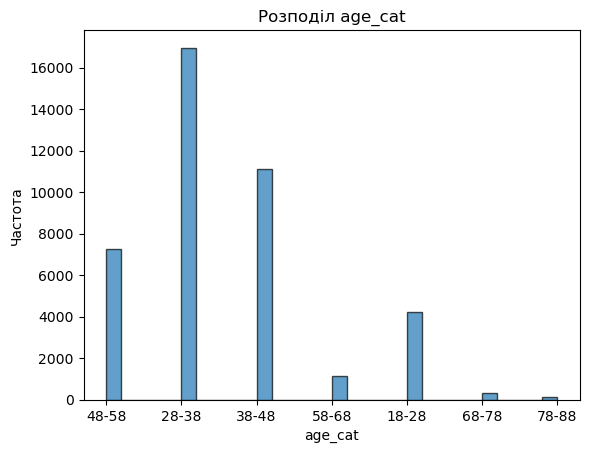

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

column = "age_cat"  
plt.hist(data[column], bins=30, edgecolor='black', alpha=0.7)

plt.title(f"Розподіл {column}")
plt.xlabel(column)
plt.ylabel("Частота")
plt.show()

In [45]:
data.drop(columns='age_cat', inplace=True)

## Вибір метрики

In [46]:
class_distribution = data["y_code"].value_counts(normalize=True)
class_distribution

y_code
0    0.887693
1    0.112307
Name: proportion, dtype: float64

Дані дуже не збалансовані, тому метрика Accuracy не підходить. Вважааю доречним використовувати метрики F1-score та ROC-AUC разом. Тому що F1-score використовується коли треба правильно передбачити обидва класи, ROC-AUC якщо важлива загальна здатність моделі розрізняти класи.

In [47]:
def find_outliers_range(col_name):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)
    Min_value0 = (Q1 - 1.5 * IQR)
    Max_value0 = (Q3 + 1.5 * IQR)
    print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
    print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))
    return Min_value0, Max_value0

In [48]:
numeric_cols = ['duration_m', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()
scaler.fit(data[numeric_cols])

StandardScaler()

In [49]:
scaler.transform(data[numeric_cols])

array([[ 0.01078257, -0.56601508,  0.19475719, ...,  0.88800298,
         0.71162693,  0.33047583],
       [-0.42120263, -0.56601508,  0.19475719, ...,  0.88800298,
         0.71162693,  0.33047583],
       [-0.1242128 , -0.56601508,  0.19475719, ...,  0.88800298,
         0.71162693,  0.33047583],
       ...,
       [-0.2669222 , -0.20511415,  0.19475719, ..., -2.22583942,
        -1.49744457, -2.82177049],
       [ 0.70890151, -0.56601508,  0.19475719, ..., -2.22583942,
        -1.49744457, -2.82177049],
       [-0.07407166,  0.15578678,  0.19475719, ..., -2.22583942,
        -1.49744457, -2.82177049]])

## Розділення даних

Для початку розділю дані на тренувальні та тестові

In [50]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

In [51]:
print('train_df.shape :', train_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (32924, 44)
test_df.shape : (8231, 44)


## Вхідні та цільові стобці

In [52]:
target_col = 'y_code'

input_cols = [col for col in data.columns if col != target_col]

In [53]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [54]:
data.head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,tel_code,default_encoded,...,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,y_code,duration_m,age_encoded
0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,4.350000,3
1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2.483333,3
2,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3.766667,1
3,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2.516667,2
4,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,5.116667,3


In [55]:
print(input_cols)

['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'tel_code', 'default_encoded', 'loan_encoded', 'housing_encoded', 'month_encoded', 'day_of_week_encoded', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'duration_m', 'age_encoded']


## Logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver='liblinear')

In [57]:
model_lr.fit(train_inputs, train_targets)

LogisticRegression(solver='liblinear')

In [58]:
train_preds = model_lr.predict(train_inputs)

In [59]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
train_probs = model_lr.predict_proba(train_inputs)
train_probs

array([[0.9909045 , 0.0090955 ],
       [0.81453574, 0.18546426],
       [0.98835613, 0.01164387],
       ...,
       [0.52827923, 0.47172077],
       [0.95754892, 0.04245108],
       [0.95516786, 0.04483214]])

In [61]:
from sklearn.metrics import roc_auc_score

print('train roc_auc',roc_auc_score(train_targets, model_lr.decision_function(train_inputs)))
print('test roc_auc', roc_auc_score(test_targets, model_lr.decision_function(test_inputs)))

train roc_auc 0.926217617408107
test roc_auc 0.9242497585671184


In [62]:
from sklearn.metrics import f1_score

print('train f1 score', f1_score(train_targets, train_preds))
print('test f1 score', f1_score(test_targets, model_lr.predict(test_inputs)))

train f1 score 0.501188455008489
test f1 score 0.5057471264367817


## KNN

In [63]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(train_inputs, train_targets)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [64]:
knn_best = knn_gs.best_estimator_

print(knn_gs.best_params_, knn_gs.best_score_)

{'n_neighbors': 23} 0.9113412372646327


In [65]:
knn_gs.best_estimator_

KNeighborsClassifier(n_neighbors=23)

In [66]:
knn_best = knn_gs.best_estimator_

In [67]:
y_test_pred_proba = knn_best.predict_proba(test_inputs)

In [68]:
y_train_pred_proba = knn_best.predict_proba(train_inputs)

In [69]:
threshold = 0.4
y_pred = np.where(y_test_pred_proba[:,1]>threshold, 1,0)

In [70]:
def get_report(model, X_test, y_true):
    y_pred = model.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

In [71]:
get_report(knn_best, train_inputs, train_targets)

              precision    recall  f1-score   support

           0     0.9421    0.9666    0.9542     29213
           1     0.6693    0.5327    0.5932      3711

    accuracy                         0.9177     32924
   macro avg     0.8057    0.7496    0.7737     32924
weighted avg     0.9114    0.9177    0.9135     32924



In [72]:
get_report(knn_best, test_inputs, test_targets)

              precision    recall  f1-score   support

           0     0.9437    0.9609    0.9522      7320
           1     0.6319    0.5390    0.5818       911

    accuracy                         0.9142      8231
   macro avg     0.7878    0.7499    0.7670      8231
weighted avg     0.9092    0.9142    0.9112      8231



In [73]:
print('train roc_auc',roc_auc_score(train_targets, y_train_pred_proba[:, 1]))
print('test roc_auc', roc_auc_score(test_targets, y_test_pred_proba[:, 1]))

train roc_auc 0.9522125577197182
test roc_auc 0.9313524590163934


In [74]:
print('train f1 score', f1_score(train_targets, knn_best.predict(train_inputs)))
print('test f1 score', f1_score(test_targets, knn_best.predict(test_inputs)))

train f1 score 0.5932483120780195
test f1 score 0.5817535545023697


## Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=4, random_state=42)

In [76]:
%%time
model_dt.fit(train_inputs, train_targets)

CPU times: user 75.9 ms, sys: 2 ms, total: 77.9 ms
Wall time: 77.1 ms


DecisionTreeClassifier(max_depth=4, random_state=42)

In [77]:
y_pred_dt = model_dt.predict(train_inputs)
y_pred_dt_test = model_dt.predict(test_inputs)

In [78]:
model_dt.score(train_inputs, train_targets)

0.9135281253796622

In [79]:
model_dt.score(test_inputs, test_targets)

0.9117968655084437

In [80]:
print('train roc_auc',roc_auc_score(train_targets, y_pred_dt))
print('test roc_auc', roc_auc_score(test_targets, y_pred_dt_test))

train roc_auc 0.7389695702061673
test roc_auc 0.7308024119294836


In [81]:
print('train f1 score', f1_score(train_targets, y_pred_dt))
print('test f1 score', f1_score(test_targets, y_pred_dt_test))

train f1 score 0.5724583270761375
test f1 score 0.5556915544675642


## Gradient Boosting

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(
    n_estimators=10,
    random_state=42, 
    learning_rate=0.5)
gb_clf.fit(train_inputs, train_targets)

train_pred = gb_clf.predict(train_inputs)
test_pred = gb_clf.predict(test_inputs)

print(classification_report(train_targets, train_pred, digits=4))
print(classification_report(test_targets, test_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9394    0.9701    0.9545     29213
           1     0.6830    0.5074    0.5823      3711

    accuracy                         0.9179     32924
   macro avg     0.8112    0.7387    0.7684     32924
weighted avg     0.9105    0.9179    0.9125     32924

              precision    recall  f1-score   support

           0     0.9399    0.9684    0.9540      7320
           1     0.6647    0.5027    0.5725       911

    accuracy                         0.9169      8231
   macro avg     0.8023    0.7356    0.7632      8231
weighted avg     0.9095    0.9169    0.9118      8231



In [96]:
print('train roc_auc',roc_auc_score(train_targets, train_pred))
print('test roc_auc', roc_auc_score(test_targets, test_pred))

train roc_auc 0.738746107200274
test roc_auc 0.7355934300264526


In [97]:
print('train f1 score', f1_score(train_targets, train_pred))
print('test f1 score', f1_score(test_targets, test_pred))

train f1 score 0.5822510822510822
test f1 score 0.5725


## Результати

In [99]:
data_res = {
    "Назва моделі": ["Logistic Regression", "kNN", "Decision Tree", "Gradient Boosting"],
    "Гіперпараметри": [
        "solver='liblinear'",
        "n_neighbors=23",
        "max_depth=4, random_state=42",
        "n_estimators=10, random_state=42, learning_rate=0.5"
    ],
    "F1 Train": [0.50, 0.59, 0.57, 0.58],
    "F1 Test": [0.51, 0.58, 0.56, 0.57],
    "AUROC Train": [0.93, 0.95, 0.74, 0.74],
    "AUROC Test": [0.92, 0.93, 0.73, 0.74],
}

df_res = pd.DataFrame(data_res)
df_res


,Назва моделі,Гіперпараметри,F1 Train,F1 Test,AUROC Train,AUROC Test
0,Logistic Regression,solver='liblinear',0.50,0.51,0.93,0.92
1,kNN,n_neighbors=23,0.59,0.58,0.95,0.93
2,Decision Tree,"max_depth=4, random_state=42",0.57,0.56,0.74,0.73
3,Gradient Boosting,"n_estimators=10, random_state=42, learning_rat...",0.58,0.57,0.74,0.74


kNN і Logistic Regression показали найкращу збалансовану якість як за F1, так і за AUROC на тренувальному та тестовому наборах. Вони добре узагальнюють дані й можуть бути рекомендовані для використання або подальшого тюнінгу.

Gradient Boosting і Decision Tree  мають середні результати, з потенціалом покращення при подальшій оптимізації гіперпараметрів або застосуванні регуляризації.

Отже, для базової версії моделі варто обрати Logistic Regression або kNN, а Gradient Boosting — розглянути для подальших експериментів, оскільки він має потенціал при кращому налаштуванні.